In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X= df.drop(columns = ['koi_disposition'])
y = df['koi_disposition']

In [6]:
rf = RandomForestClassifier(n_estimators=200)
# fits random forest model to X and y
rf = rf.fit(X, y)
# returns the importance of each column to predicting the outcomes
importances = rf.feature_importances_
sorted(zip(importances, X.keys()), reverse=True)

[(0.11345814045880986, 'koi_fpflag_co'),
 (0.101224083730834, 'koi_fpflag_nt'),
 (0.06957323390620054, 'koi_fpflag_ss'),
 (0.05428927090186432, 'koi_model_snr'),
 (0.05082702248767769, 'koi_prad'),
 (0.03671053006815837, 'koi_fpflag_ec'),
 (0.03428482387461765, 'koi_duration_err1'),
 (0.03176741802003541, 'koi_duration_err2'),
 (0.03088459630847872, 'koi_prad_err1'),
 (0.029325670175726216, 'koi_steff_err1'),
 (0.028799352584748222, 'koi_prad_err2'),
 (0.026206297713796397, 'koi_steff_err2'),
 (0.023933529567390026, 'koi_time0bk_err1'),
 (0.023313305717169452, 'koi_duration'),
 (0.02308501623161511, 'koi_time0bk_err2'),
 (0.020636795308044787, 'koi_period'),
 (0.020037201126070943, 'koi_depth'),
 (0.018673807842494818, 'koi_impact'),
 (0.018057318146845504, 'koi_period_err2'),
 (0.01780540096516545, 'koi_period_err1'),
 (0.017348338708865832, 'koi_insol_err1'),
 (0.01585116357943383, 'koi_insol'),
 (0.015658114677505483, 'koi_teq'),
 (0.014998358136256093, 'koi_depth_err1'),
 (0.014247

In [7]:
# Features with importance > 3% are selected
X = df[["koi_fpflag_co", "koi_fpflag_nt", "koi_fpflag_ss", "koi_model_snr", "koi_prad", "koi_prad_err1", "koi_fpflag_ec", "koi_prad_err2", "koi_duration_err1", "koi_duration_err2", "koi_steff_err1"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_prad_err1,koi_fpflag_ec,koi_prad_err2,koi_duration_err1,koi_duration_err2,koi_steff_err1
3563,0,0,0,11.7,3.89,0.65,0,-0.34,0.1430,-0.1430,120
4099,0,0,0,18.0,2.10,0.14,0,-0.20,0.1530,-0.1530,144
5460,0,0,0,476.0,14.59,1.15,0,-1.28,0.0152,-0.0152,126
1091,0,0,0,34.7,2.28,0.32,0,-0.20,0.1650,-0.1650,101
5999,0,0,0,8.7,2.27,1.27,0,-0.54,0.9390,-0.9390,164


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

# Model-(I) Random Forest

In [11]:
rf_model = RandomForestClassifier()
rf_model

RandomForestClassifier()

# Hyper parameter Tuning using Grid Search

In [12]:
param_grid = {"n_estimators" : [10, 50, 100, 200],
"max_depth" : [3, 10, 20, 40]}
grid = GridSearchCV(rf_model, param_grid, verbose=3)

In [13]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.847, total=   0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.883, total=   0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.869, total=   0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.857, total=   0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=3, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ max_depth=3, n_estimators=50, score=0.852, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.874, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.858, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.836, total=   0.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.848, total=   0.1s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ....... max_depth=3, n_estimators=100, score=0.832, total=   0.2s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ....... max_depth=3, n_estimators=100, score=0.854, total=   0.2s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[CV] ....... max_depth=40, n_estimators=10, score=0.878, total=   0.1s
[CV] max_depth=40, n_estimators=10 ...................................
[CV] ....... max_depth=40, n_estimators=10, score=0.859, total=   0.1s
[CV] max_depth=40, n_estimators=50 ...................................
[CV] ....... max_depth=40, n_estimators=50, score=0.875, total=   0.2s
[CV] max_depth=40, n_estimators=50 ...................................
[CV] ....... max_depth=40, n_estimators=50, score=0.884, total=   0.2s
[CV] max_depth=40, n_estimators=50 ...................................
[CV] ....... max_depth=40, n_estimators=50, score=0.883, total=   0.2s
[CV] max_depth=40, n_estimators=50 ...................................
[CV] ....... max_depth=40, n_estimators=50, score=0.890, total=   0.2s
[CV] max_depth=40, n_estimators=50 ...................................
[CV] ....... max_depth=40, n_estimators=50, score=0.865, total=   0.2s
[CV] max_depth=40, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   29.0s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 10, 20, 40],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'n_estimators': 200}
0.8851790873168921


In [15]:
rf_model = grid.best_estimator_
print("Random Forest Classifier Model Results :-")
print(f"Training Data Score: {round(rf_model.score(X_train, y_train),4)}")
print(f"Testing Data Score: {round(rf_model.score(X_test, y_test),4)}")

Random Forest Classifier Model Results :-
Training Data Score: 0.9941
Testing Data Score: 0.8987


# Logistic Regression

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test =  scaler.transform(X_test)

In [17]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [18]:
param_grid = {'C': [1, 5, 10, 50, 100, 150]}
l_grid = GridSearchCV(classifier, param_grid, verbose=3)

In [19]:
l_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.836, total=   0.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. C=1, score=0.827, total=   0.1s
[CV] C=1 .............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the do

[CV] ................................. C=1, score=0.806, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.822, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.822, total=   0.1s
[CV] C=5 .............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................. C=5, score=0.859, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.848, total=   0.1s
[CV] C=5 .............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................. C=5, score=0.829, total=   0.1s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.832, total=   0.1s
[CV] C=5 .............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................. C=5, score=0.834, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.856, total=   0.1s
[CV] C=10 ............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................ C=10, score=0.861, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.834, total=   0.1s
[CV] C=10 ............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................ C=10, score=0.836, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.845, total=   0.1s
[CV] C=50 ............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................ C=50, score=0.856, total=   0.1s
[CV] C=50 ............................................................
[CV] ................................ C=50, score=0.858, total=   0.1s
[CV] C=50 ............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................ C=50, score=0.846, total=   0.1s
[CV] C=50 ............................................................
[CV] ................................ C=50, score=0.841, total=   0.1s
[CV] C=50 ............................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ................................ C=50, score=0.848, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.860, total=   0.1s
[CV] C=100 ...........................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ............................... C=100, score=0.863, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.848, total=   0.1s
[CV] C=100 ...........................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ............................... C=100, score=0.843, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.849, total=   0.1s
[CV] C=150 ...........................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ............................... C=150, score=0.860, total=   0.1s
[CV] C=150 ...........................................................
[CV] ............................... C=150, score=0.865, total=   0.1s
[CV] C=150 ...........................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ............................... C=150, score=0.847, total=   0.1s
[CV] C=150 ...........................................................
[CV] ............................... C=150, score=0.841, total=   0.1s
[CV] C=150 ...........................................................


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

[CV] ............................... C=150, score=0.847, total=   0.1s


C:\Users\paras\Anaconda3\envs\PythonAdvance\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 100, 150]}, verbose=3)

In [20]:
print(l_grid.best_params_)
print(l_grid.best_score_)

{'C': 100}
0.8525627824391098


In [21]:
classifier = l_grid.best_estimator_
# classifier.fit(X_train, y_train)
print("Logistic Regression Model Results :-")
print(f"Training Data Score: {round(classifier.score(X_train, y_train),4)}")
print(f"Testing Data Score: {round(classifier.score(X_test, y_test),4)}")

Logistic Regression Model Results :-
Training Data Score: 0.8529
Testing Data Score: 0.8696


In [22]:
X_train.shape

(5243, 11)

# K Nearest Neighbour

k: 1, Train/Test Score: 1.000/0.834
k: 3, Train/Test Score: 0.906/0.854
k: 5, Train/Test Score: 0.891/0.862
k: 7, Train/Test Score: 0.882/0.874
k: 9, Train/Test Score: 0.881/0.877
k: 11, Train/Test Score: 0.875/0.874
k: 13, Train/Test Score: 0.874/0.873
k: 15, Train/Test Score: 0.872/0.869
k: 17, Train/Test Score: 0.869/0.867
k: 19, Train/Test Score: 0.869/0.870
k: 21, Train/Test Score: 0.868/0.870
k: 23, Train/Test Score: 0.867/0.871
k: 25, Train/Test Score: 0.869/0.872
k: 27, Train/Test Score: 0.869/0.870
k: 29, Train/Test Score: 0.870/0.872
k: 31, Train/Test Score: 0.868/0.869
k: 33, Train/Test Score: 0.866/0.869
k: 35, Train/Test Score: 0.867/0.871
k: 37, Train/Test Score: 0.868/0.871
k: 39, Train/Test Score: 0.866/0.870


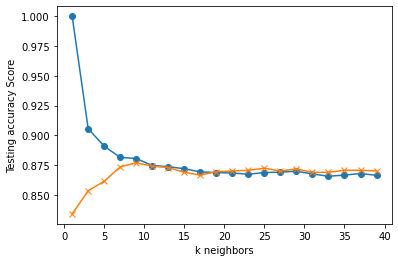

In [23]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("K Nearest Neighbour Model Results (@ k=9) :- ")
print(f"Training Data Score: {round(knn.score(X_train, y_train),4)}")
print(f"Testing Data Score: {round(knn.score(X_test, y_test),4)}")
# print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

K Nearest Neighbour Model Results (@ k=9) :- 
Training Data Score: 0.8806
Testing Data Score: 0.877


# Support Vector Model

In [25]:
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

SVC(kernel='linear')

In [26]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svm_model, param_grid, verbose=3)

In [27]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.833, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.824, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.802, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.813, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.821, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.833, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.824, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.802, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.813, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.821, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.865, total=   0.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.851, total=   0.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.844, total=   0.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.850, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.856, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.865, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.851, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.6s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.853325959292383


In [29]:
svm_model = grid.best_estimator_
print("Support Vector Model Results :- ")
print(f"Training Data Score: {round(svm_model.score(X_train, y_train),4)}")
print(f"Testing Data Score: {round(svm_model.score(X_test, y_test),4)}")

Support Vector Model Results :- 
Training Data Score: 0.8545
Testing Data Score: 0.8713


# Save the Model

In [30]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'random_forest.sav'
joblib.dump(rf_model, filename)

['random_forest.sav']